# Comparing VI redshifts with a truth table

This notebook compares VI redshifts and flags to the real redshifts from the sims. It identifies some problematic cases and plots them on a prospect window.

This notebook is set up to work on the svdc2019c sims, not data.

In [1]:
import os, sys
import numpy as np
from astropy.io import fits
from astropy.table import Table, join
import pandas as pd

import desispec
# library location will change ..
sys.path.append("/global/homes/r/rtojeiro/prospect/prospect/py")
from prospect import utils_specviewer,plotframes
import matplotlib.pyplot as plt



## Read in 

In [2]:
df = pd.read_csv(os.environ['HOME']+'/SV/vi_merged.csv')
vi = Table.from_pandas(df)

In [3]:
truth = Table.read('/global/project/projectdirs/desi/datachallenge/svdc-summer2019/svdc2019c/targets/truth.fits', hdu=1)

In [4]:
targets = Table.read('/global/project/projectdirs/desi/datachallenge/svdc-summer2019/svdc2019c/targets/targets.fits', hdu=1)

In [5]:
targets.keys()

['RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'RA',
 'DEC',
 'RA_IVAR',
 'DEC_IVAR',
 'DCHISQ',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FRACDEV',
 'FRACDEV_IVAR',
 'SHAPEDEV_R',
 'SHAPEDEV_R_IVAR',
 'SHAPEDEV_E1',
 'SHAPEDEV_E1_IVAR',
 'SHAPEDEV_E2',
 'SHAPEDEV_E2_IVAR',
 'SHAPEEXP_R',
 'SHAPEEXP_R_IVAR',
 'SHAPEEXP_E1',
 'SHA

Join truth tables and master VI file

In [6]:
truth.rename_column('TARGETID', 'TargetID') 
targets.rename_column('TARGETID', 'TargetID')

In [5]:
vi = join(vi, truth, join_type='left', keys='TargetID')

Add pixel number from the targets table

In [7]:
vi = join(vi, targets, join_type='left', keys='TargetID')

In [8]:
vi

<Table length=888>
     TargetID      ExpID Spec version ...   SUBPRIORITY   NUMOBS_INIT HPXPIXEL
      int64        int64    int64     ...     float64        int64     int64  
------------------ ----- ------------ ... --------------- ----------- --------
288230400122160605    -1            0 ...  0.834377675519           1     5715
288230400122160671    -1            0 ...  0.573289166476           1     5715
288230400122160683    -1            0 ...  0.902931085437           1     5715
288230400122160796    -1            0 ...  0.885260819167           1     5715
288230400122160805    -1            0 ...  0.485427825915           1     5715
288230400122160890    -1            0 ... 0.0612117929763           1     5715
288230400122160991    -1            0 ...  0.820413834418           1     5715
288230400122161190    -1            0 ...  0.888611031993           1     5715
288230400122164730    -1            0 ...  0.290626891681           1     5715
288230400893915558    -1            0 ...  0.952479023078           4     5899
               ...   ...          ... ...             ...         ...      ...
288230508515559730    -1            0 ...  0.519435419436           1    31558
288230508515559732    -1            0 ...  0.571615514527           1    31558
288230508515559784    -1            0 ...  0.117414706282           1    31558
288230513552920446    -1            0 ...  0.258278760634           4    32759
288230513552927036    -1            0 ...  0.151039103772           4    32759
288230513552927083    -1            0 ...  0.680397393964           4    32759
288230513552927350    -1            0 ... 0.0552625286135           4    32759
288230513552927407    -1            0 ...   0.58586896846           4    32759
288230513552927665    -1            0 ...  0.677882480982           4    32759
288230513552927674    -1            0 ...   0.57614546739           4    32759

## Diagnostic plots

Text(0,0.5,'TRUEZ')

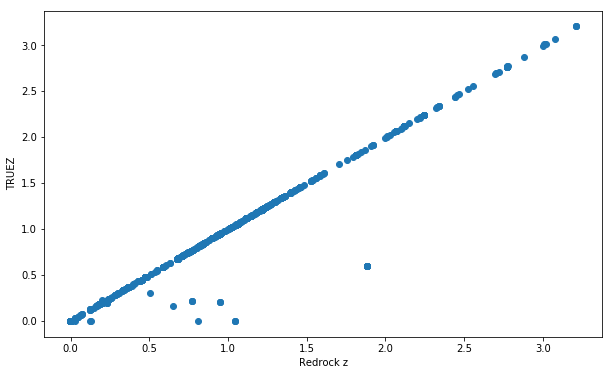

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(vi['Redrock z'], vi['TRUEZ'])
plt.xlabel('Redrock z')
plt.ylabel('TRUEZ')

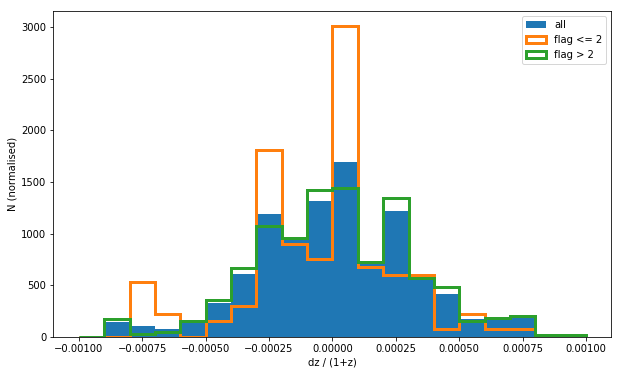

In [7]:
dz = (vi['Redrock z'] - vi['TRUEZ']) / (1 + vi['TRUEZ'])
plt.figure(figsize=(10,6))
x = plt.hist(dz, bins=20, range=(-1e-3, 1e-3), density=True, label='all')
plt.xlabel('dz / (1+z)')
plt.ylabel('N (normalised)')

x = plt.hist(dz[vi['VI class'] <=2], bins=20, range=(-1e-3, 1e-3), histtype='step', \
             density=True, label='flag <= 2', lw=3)
x = plt.hist(dz[vi['VI class'] > 2], bins=20, range=(-1e-3, 1e-3), histtype='step', \
             density=True, label='flag > 2', lw=3)
plt.legend()


In [8]:
bad_z = np.abs(dz) > 1e-2
print('number of bad redshifts: ', len(vi[bad_z]))

number of bad redshifts:  27


In [9]:
vi[bad_z]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

<Table length=27>
     TargetID      VI class Redrock z    TRUEZ     TRUESPECTYPE TEMPLATETYPE
      int64         int64    float64    float32       str10        str10    
------------------ -------- --------- ------------ ------------ ------------
288230400893917232        2     0.126   0.00132108   STAR         STAR      
288230400893917237        1     0.131 -0.000838826   STAR         STAR      
288230420678448773        1     0.952     0.201905   QSO          QSO       
288230420678448773        3     0.952     0.201905   QSO          QSO       
288230420678448773        2     0.952     0.201905   QSO          QSO       
288230420678449182        2     1.042   0.00041375   STAR         STAR      
288230420678449182        4     1.042   0.00041375   STAR         STAR      
288230420678449182        1     1.042   0.00041375   STAR         STAR      
288230484385732548        3     1.881     0.595345   QSO          QSO       
288230484385732548        2     1.881     0.595345   QSO          QSO       
               ...      ...       ...          ...          ...          ...
288230485253947746        0     0.232     0.199829   GALAXY       BGS       
288230485253947746        2     0.232     0.199829   GALAXY       BGS       
288230485253947766        0     0.769     0.217558   GALAXY       BGS       
288230485253947766        0     0.769     0.217558   GALAXY       BGS       
288230485253947766        0     0.769     0.217558   GALAXY       BGS       
288230485778235891        2     0.653     0.168198   GALAXY       BGS       
288230485778235922        2     0.201     0.233349   GALAXY       BGS       
288230485778235929        2     0.503     0.302619   GALAXY       BGS       
288230513552927350        2     0.811 -0.000126662   STAR         STAR      
288230513552927407        2     0.027  -0.00049533   STAR         STAR

Text(0.5,0,'VI flag')

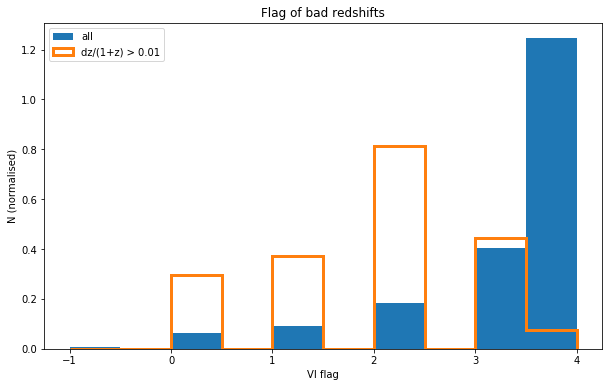

In [10]:
plt.figure(figsize=(10,6))
x = plt.hist(vi['VI class'], density=True, stacked=True, range=(-1,4), label='all')
x = plt.hist(vi[bad_z]['VI class'], density=True, stacked=True, range=(-1,4), \
             histtype='step', lw=3, label='dz/(1+z) > 0.01')
plt.legend()
plt.title('Flag of bad redshifts')
plt.ylabel('N (normalised)')
plt.xlabel('VI flag')

## Look at objects with poor flag but correct redshift

In [11]:
prob = (bad_z==False) & (vi['VI class'] <2) 
prob_ELG = (bad_z==False) & (vi['VI class'] <2) & (vi['TEMPLATETYPE'] == 'ELG       ')

In [12]:
vi[prob]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

<Table length=64>
     TargetID      VI class Redrock z  TRUEZ   TRUESPECTYPE TEMPLATETYPE
      int64         int64    float64  float32     str10        str10    
------------------ -------- --------- -------- ------------ ------------
288230403565684169       -1     1.249  1.24815   GALAXY       ELG       
288230403565684424        1      1.23  1.22887   GALAXY       ELG       
288230403565684424        1      1.23  1.22887   GALAXY       ELG       
288230403565684638        1     1.449  1.44889   GALAXY       ELG       
288230403565684862       -1     0.776 0.776305   GALAXY       ELG       
288230403565684932        1     1.525   1.5253   GALAXY       ELG       
288230403565685470        1       1.4  1.40041   GALAXY       ELG       
288230403565685552        1     1.217  1.21763   GALAXY       ELG       
288230403565685552        0     1.217  1.21763   GALAXY       ELG       
288230403565685552        1     1.217  1.21763   GALAXY       ELG       
               ...      ...       ...      ...          ...          ...
288230485253947788        1     0.162 0.161691   GALAXY       BGS       
288230485253947791        0     0.325 0.324499   GALAXY       BGS       
288230485253947791        0     0.325 0.324499   GALAXY       BGS       
288230485253947793        1     0.371 0.370482   GALAXY       BGS       
288230485253947798        1     0.199 0.198908   GALAXY       BGS       
288230485253947809        1     0.369 0.369336   GALAXY       BGS       
288230485253947809        1     0.369 0.369336   GALAXY       BGS       
288230485253947814        0     0.256 0.255761   GALAXY       BGS       
288230485253947814        0     0.256 0.255761   GALAXY       BGS       
288230485253947829        1      0.44 0.440043   GALAXY       BGS

Spot checks (spectra plots are screenshots)

In [ ]:
def show_problem_VI_single(vi_insp, targetID, plot_with_Prospect=False):
    pixel_number=vi_insp['HPXPIXEL'][vi_insp.TargetID==targetID].iloc[0]
    display(vi_insp[vi_insp.TargetID==targetID])
    
    #find the files for this pixel, and read the spectra and the zbest from redrock
    specfile=desispec.io.findfile('spectra', groupname=str(pixel_number))
    zbfile=desispec.io.findfile('zbest', groupname=pixel_number)
    spectra = desispec.io.read_spectra(specfile)
    zbest = Table.read(zbfile, 'ZBEST')   
 
    #for target in our_targets: display_problem_objects(vi_insp_grp, pixel_number, target)
    sp_single_exp = spectra.select(targets=[targetID])
    sp_coadd = utils_specviewer.coadd_targets(sp_single_exp)
    if plot_with_Prospect: plotframes.plotspectra(sp_single_exp, zcatalog=zbest, notebook=True,with_vi_widgets=False)
    return sp_single_exp

In [13]:
this_ID = (vi['TargetID'] == 288230485253947791) #BGS
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

<Table length=3>
     TargetID      VI class Redrock z  TRUEZ   TRUESPECTYPE TEMPLATETYPE
      int64         int64    float64  float32     str10        str10    
------------------ -------- --------- -------- ------------ ------------
288230485253947791        0     0.325 0.324499   GALAXY       BGS       
288230485253947791        2     0.325 0.324499   GALAXY       BGS       
288230485253947791        0     0.325 0.324499   GALAXY       BGS

https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/bgs/pix26012/specviewer_BGS_ANY_pix26012_4.html -> spec 11

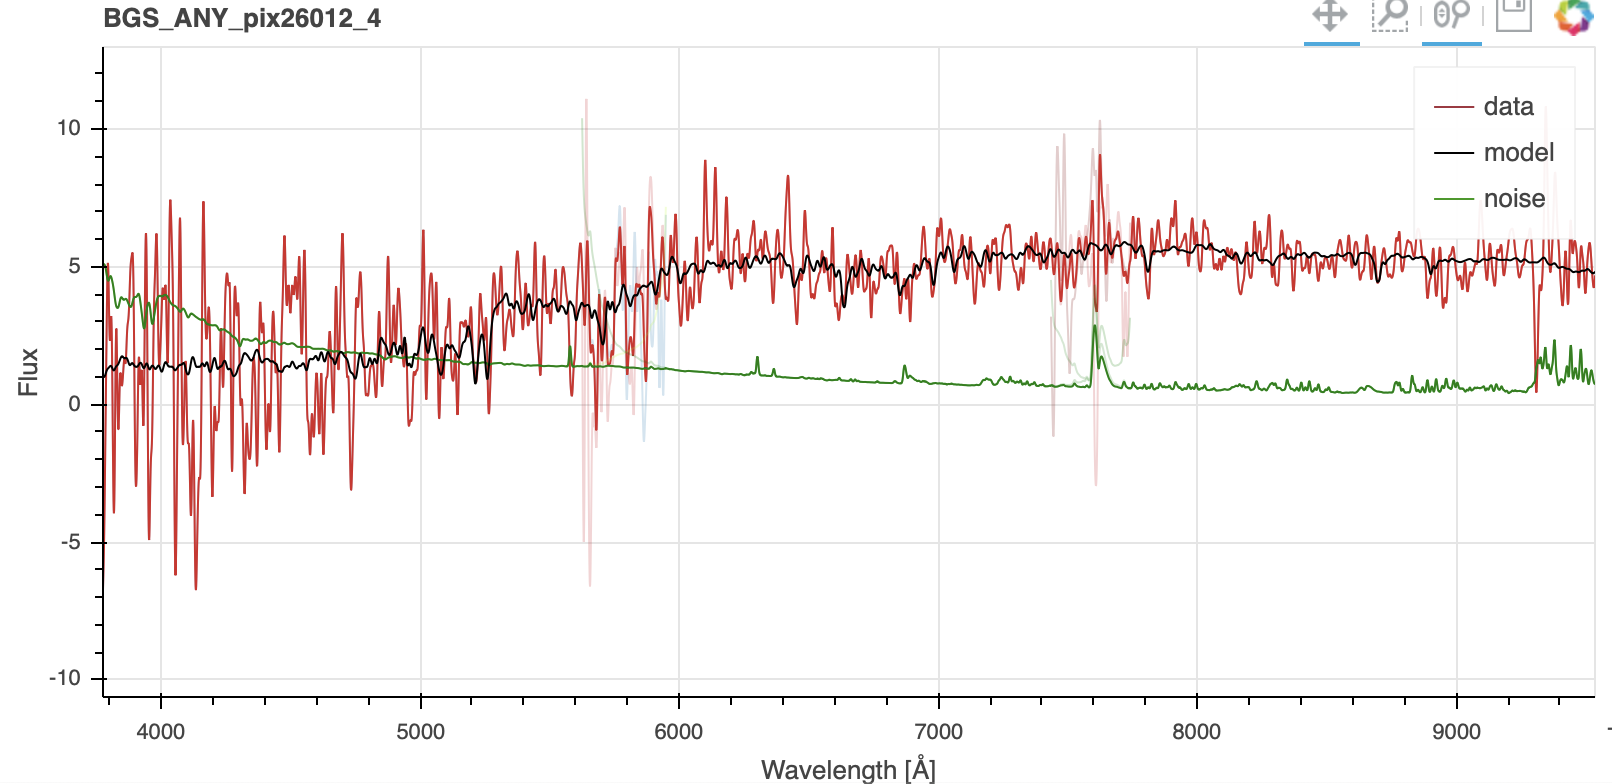

***

In [14]:
this_ID = (vi['TargetID'] == 288230403565684424) #ELG
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

<Table length=3>
     TargetID      VI class Redrock z  TRUEZ  TRUESPECTYPE TEMPLATETYPE
      int64         int64    float64  float32    str10        str10    
------------------ -------- --------- ------- ------------ ------------
288230403565684424        3      1.23 1.22887   GALAXY       ELG       
288230403565684424        1      1.23 1.22887   GALAXY       ELG       
288230403565684424        1      1.23 1.22887   GALAXY       ELG

https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/elg_bluesquare/pix6536/specviewer_ELG_pix6536_1.html -> spec 0

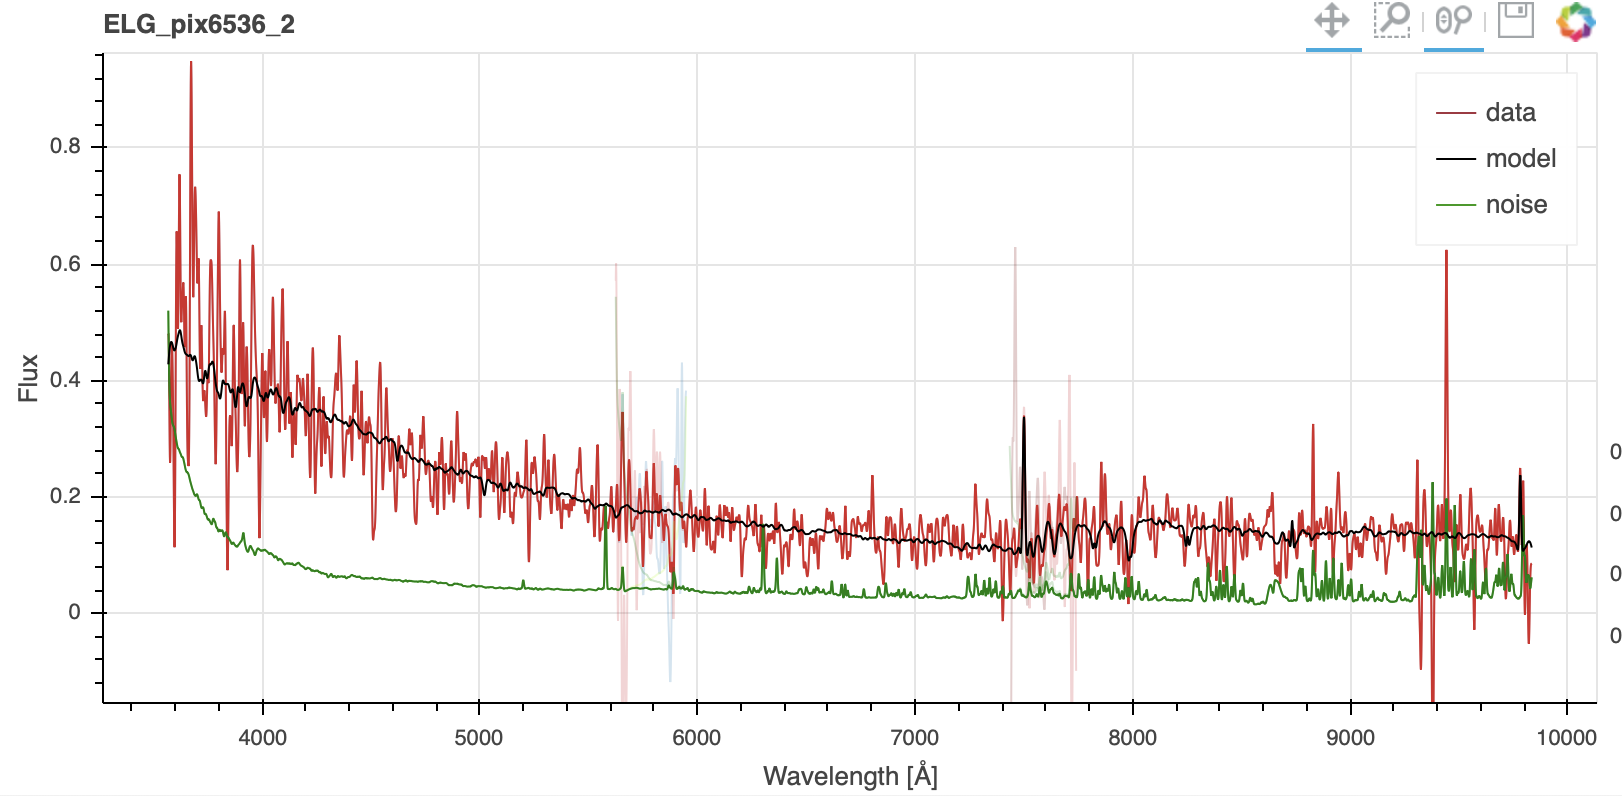


***

In [15]:
this_ID = (vi['TargetID'] == 288230403565685552) #ELG - flags vary from 0 to 4
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

<Table length=7>
     TargetID      VI class Redrock z  TRUEZ  TRUESPECTYPE TEMPLATETYPE
      int64         int64    float64  float32    str10        str10    
------------------ -------- --------- ------- ------------ ------------
288230403565685552        3     1.217 1.21763   GALAXY       ELG       
288230403565685552        1     1.217 1.21763   GALAXY       ELG       
288230403565685552        0     1.217 1.21763   GALAXY       ELG       
288230403565685552        1     1.217 1.21763   GALAXY       ELG       
288230403565685552        2     1.217 1.21763   GALAXY       ELG       
288230403565685552        4     1.217 1.21763   GALAXY       ELG       
288230403565685552        2     1.217 1.21763   GALAXY       ELG

https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/elg_bluesquare/pix6536/specviewer_ELG_pix6536_2.html -> spec 14

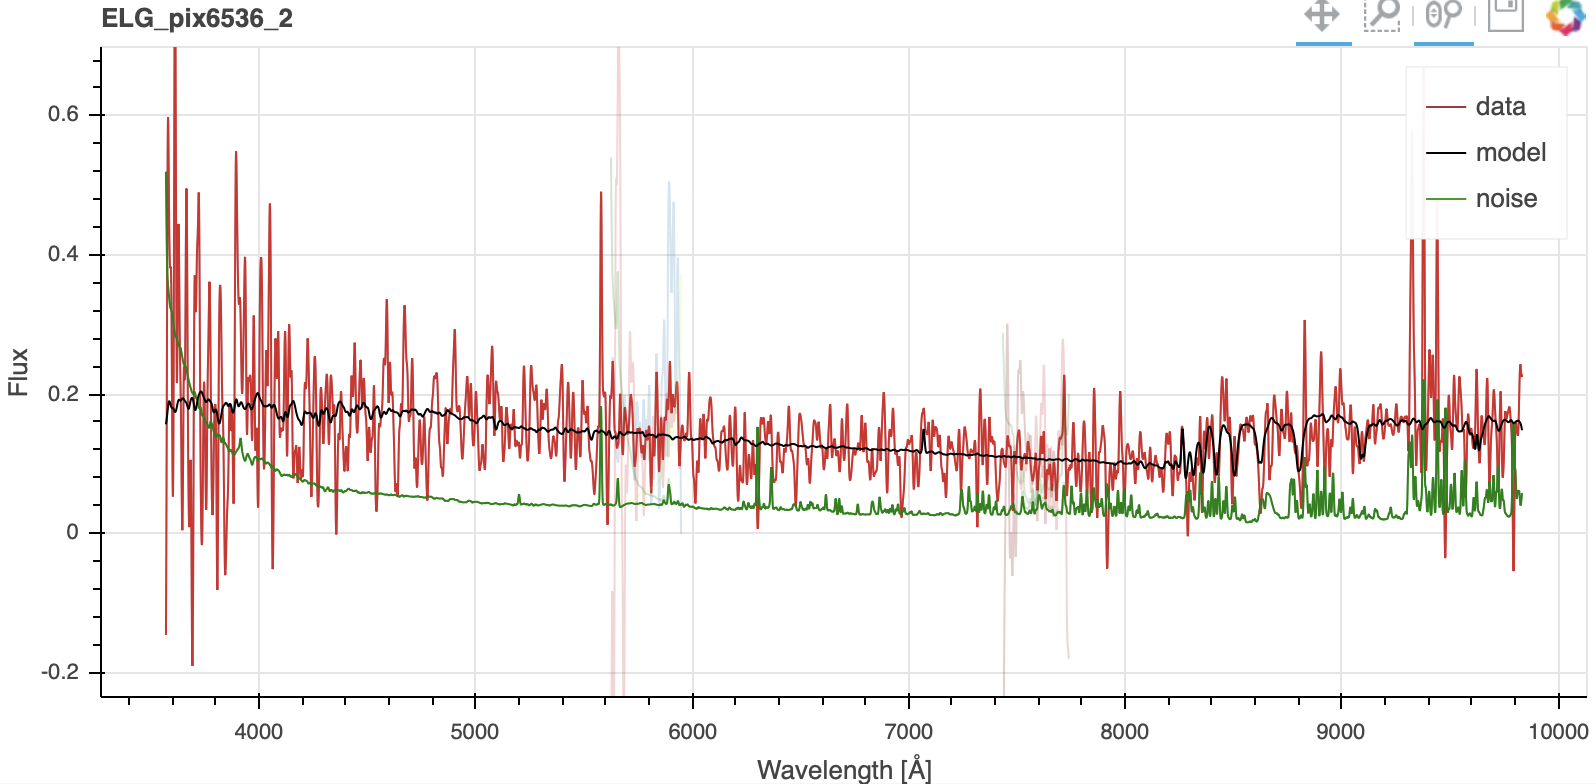




***

In [16]:
this_ID = (vi['TargetID'] == 288230485253947809)
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

<Table length=3>
     TargetID      VI class Redrock z  TRUEZ   TRUESPECTYPE TEMPLATETYPE
      int64         int64    float64  float32     str10        str10    
------------------ -------- --------- -------- ------------ ------------
288230485253947809        1     0.369 0.369336   GALAXY       BGS       
288230485253947809        1     0.369 0.369336   GALAXY       BGS       
288230485253947809        2     0.369 0.369336   GALAXY       BGS

https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/bgs/pix26012/specviewer_BGS_ANY_pix26012_4.html  -> spec 12

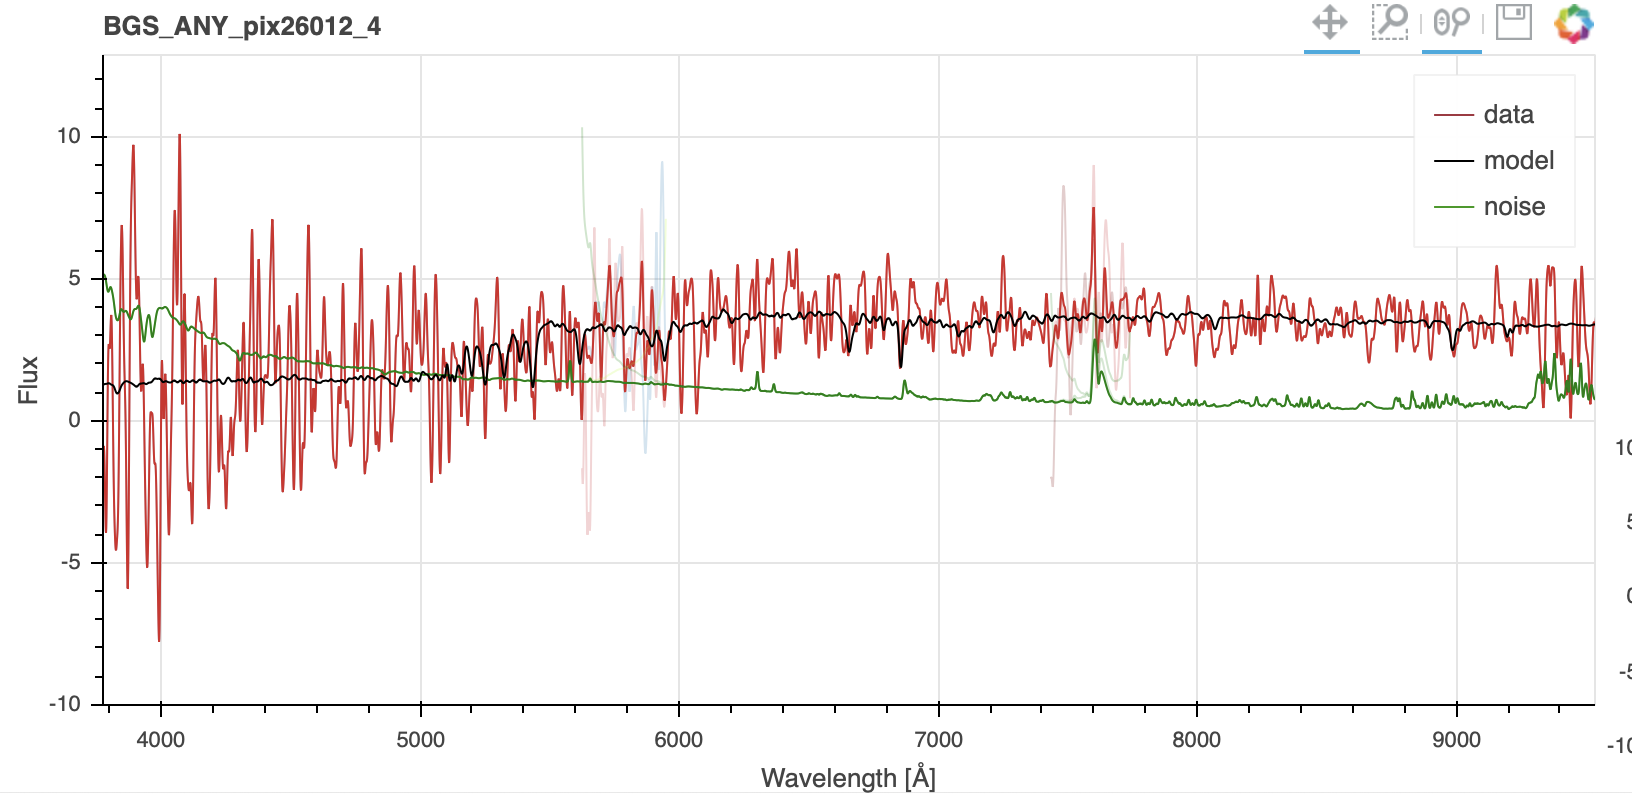

***